# Miniaturowy przykĹad notatnika Jupyter do projektu ZUM z uĹźyciem jÄzyka Python

Jest to przykĹad demonstrujÄcy **wyĹÄcznie** pobieranie plikĂłw z danymi oraz dodatkowych plikĂłw ĹşrĂłdĹowych z kodem, nie naleĹźy go traktowaÄ jako wzorca realizacji i dokumentowania projektu.

**Pobieranie plikĂłw z danymi (oryginalne ĹşrĂłdĹo [UCI](https://archive.ics.uci.edu/ml/datasets/census+income), tutaj uĹźywana wersja przetworzona do formatu CSV):**

In [ ]:
!wget -nc elektron.elka.pw.edu.pl/~pcichosz/zum/projekt/census-income-train.csv
!wget -nc elektron.elka.pw.edu.pl/~pcichosz/zum/projekt/census-income-test.csv

--2023-03-29 08:32:44--  http://elektron.elka.pw.edu.pl/~pcichosz/zum/projekt/census-income-train.csv
Resolving elektron.elka.pw.edu.pl (elektron.elka.pw.edu.pl)... 194.29.160.103
Connecting to elektron.elka.pw.edu.pl (elektron.elka.pw.edu.pl)|194.29.160.103|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3518606 (3.4M) [text/csv]
Saving to: âcensus-income-train.csvâ

census-income-train 100%[===================>]   3.36M   775KB/s    in 5.1s    

2023-03-29 08:32:49 (669 KB/s) - âcensus-income-train.csvâ saved [3518606/3518606]

--2023-03-29 08:32:50--  http://elektron.elka.pw.edu.pl/~pcichosz/zum/projekt/census-income-test.csv
Resolving elektron.elka.pw.edu.pl (elektron.elka.pw.edu.pl)... 194.29.160.103
Connecting to elektron.elka.pw.edu.pl (elektron.elka.pw.edu.pl)|194.29.160.103|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1759072 (1.7M) [text/csv]
Saving to: âcensus-income-test.csvâ

census-income-test. 100%[========

**Pobieranie dodatkowych plikĂłw ĹşrĂłdĹowych:**

In [ ]:
!wget -nc elektron.elka.pw.edu.pl/~pcichosz/zum/projekt/plot_roc.py

--2023-03-29 08:32:53--  http://elektron.elka.pw.edu.pl/~pcichosz/zum/projekt/plot_roc.py
Resolving elektron.elka.pw.edu.pl (elektron.elka.pw.edu.pl)... 194.29.160.103
Connecting to elektron.elka.pw.edu.pl (elektron.elka.pw.edu.pl)|194.29.160.103|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 429 [text/x-python]
Saving to: âplot_roc.pyâ

plot_roc.py         100%[===================>]     429  --.-KB/s    in 0s      

2023-03-29 08:32:54 (62.7 MB/s) - âplot_roc.pyâ saved [429/429]



Eksperymenty...

In [ ]:
import pandas as pd

In [ ]:
cin_train = pd.read_csv('census-income-train.csv')
cin_test = pd.read_csv('census-income-test.csv')

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.pipeline import make_pipeline

In [ ]:
rf = make_pipeline(make_column_transformer((OneHotEncoder(handle_unknown='ignore'),
                                            make_column_selector(dtype_exclude='number')),
                                           remainder = 'passthrough'),
                   RandomForestClassifier())
rf.fit(cin_train.drop('income', axis=1), cin_train['income'])

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f0dd5103d90>)])),
                ('randomforestclassifier', RandomForestClassifier())])

In [ ]:
cin_prob = rf.predict_proba(cin_test)[:,1]

In [ ]:
from plot_roc import plot_roc

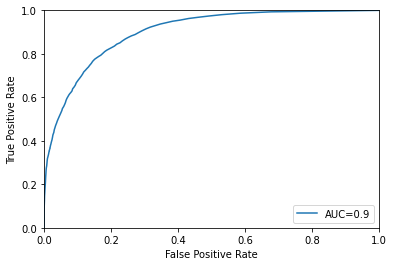

In [ ]:
plot_roc(cin_test['income'].to_numpy(), cin_prob)